In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('SpaceInvaders-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
callback = JupyterCallback()

In [7]:
agent = DeepQAgent(env, learning_rate=0.001, frames_per_action=3)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<SpaceInvaders-v0>>>,
    learning_rate=0.001,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9998,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=3,
    replay_size=20000
)

In [8]:
res_random = agent.run()
res_random

100%|██████████| 30/30 [00:34<00:00,  1.15s/game]


array([140., 145.,   0., 200.,  35.,  55.,  70., 310., 105.,  95., 185.,
       200.,  80.,  55.,  80., 385., 100., 115.,  35., 300., 110., 160.,
        70.,  40., 190., 120.,  70.,  80., 230., 465.])

In [9]:
res_random.mean()

140.83333333333334

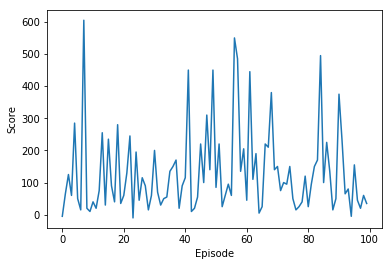

100%|██████████| 100/100 [29:19<00:00, 17.59s/episode]


In [10]:
agent.train(episodes=100, callback=JupyterCallback())

In [11]:
res_trained = agent.run()
res_trained

100%|██████████| 30/30 [00:22<00:00,  1.32game/s]


array([-20., -20.,  10., -10., -20.,  15., -20., -20., -30., -25., -10.,
       -20., -30., -30., -25.,  10., -30., -30., -25.,  25., -30., -10.,
       -30., -10., -20., -20.,  -5., -10.,  -5., -10.])

In [12]:
res_trained.mean()

-15.166666666666666